In [1]:
import earthkit.data
import earthkit.plots
from earthkit.plots.resample import Subsample, Regrid

/Users/mavj/opt/miniconda3/envs/DEVELOP/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [32]:
vorticity = earthkit.data.from_source(
    "file",
    "/Users/mavj/Downloads/vorticity(2).grib",
)

wind = earthkit.data.from_source(
    "file",
    "/Users/mavj/Downloads/wind.grib",
)

In [33]:
vorticity.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,vo,isobaricInhPa,700,20120524,0,0,fc,0,reduced_gg


In [34]:
wind.sel(level=700, short_name=["u", "v"]).ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,u,isobaricInhPa,700,20120524,0,0,fc,0,reduced_gg
1,ecmf,v,isobaricInhPa,700,20120524,0,0,fc,0,reduced_gg


In [35]:
PRESSURE = 700

LEVELS = [1.0,
        3.0,
        5.0,
        7.0,
        9.0,
        11.0,
        13.0,
        15.0,
        20.0,
        30.0,
        50.0,
        75.0,
        100.0,
        200.0,]
LEVELS = [0-level for level in LEVELS[::-1]] + LEVELS

In [48]:
colors = [
    "#00004d",
    "#000080",
    "#0000b3",
    "#0000e6",
    "#0026ff",
    "#004dff",
    "#0073ff",
    "#0099ff",
    "#00bfff",
    "#00d9ff",  # Assumed missing value to be 0.85 instead of empty
    "#33f2ff",
    "#73ffff",
    "#bfffff",
    "white",
    "#ffff00",
    "#ffea00",
    "#ffcc00",
    "#ffb300",
    "#ff9900",
    "#ff8000",
    "#ff6600",
    "#ff4d00",
    "#ff2600",
    "#e60000",
    "#b30000",
    "#800000",
    "#4d0000",
]


In [49]:
STYLE = earthkit.plots.styles.Style(
    colors=colors,
    levels=LEVELS,
    extend="both",
    scale_factor=10**5,
    ticks=LEVELS,
)

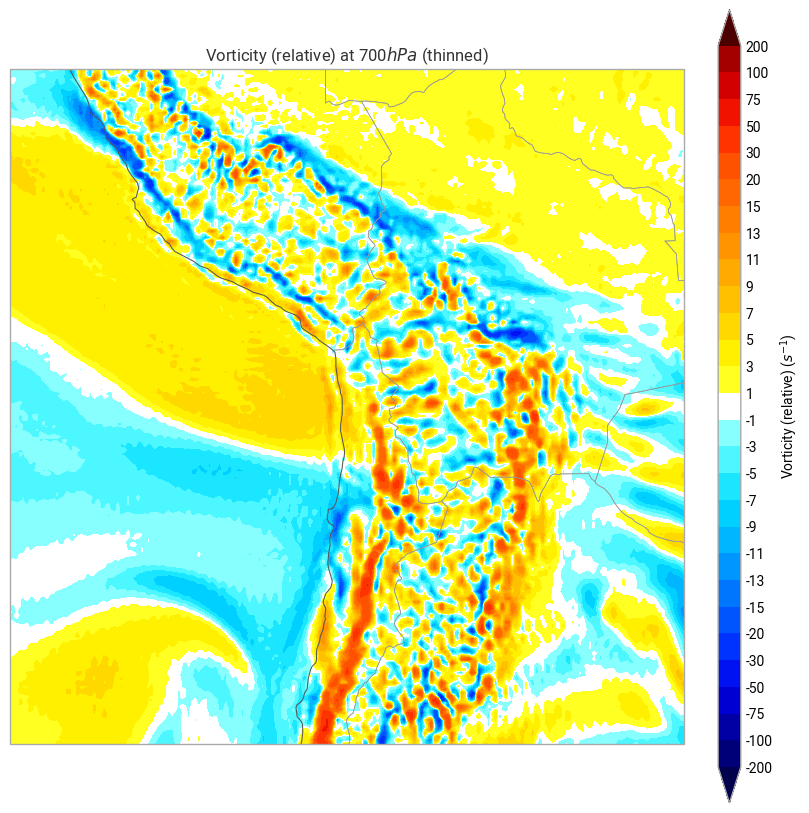

In [74]:
figure = earthkit.plots.Figure(rows=1, columns=1, size=(8, 10))

thinned = figure.add_map(domain=[-80, -60, -30, -10])
thinned.contourf(vorticity.sel(level=PRESSURE), style=STYLE)
# thinned.quiver(wind.sel(level=PRESSURE, short_name=["u", "v"]), resample=Regrid(20))
thinned.title("{variable_name!0} at {level!0}$hPa$ (thinned)")

# regridded = figure.add_map(domain="North Atlantic")
# regridded.block(vorticity.sel(level=PRESSURE), style=STYLE)
# regridded.barbs(wind.sel(level=PRESSURE, short_name=["u", "v"]), regrid_shape=20)
# regridded.title("{variable_name!0} at {level}$hPa$ (regridded)")

# default = figure.add_map(domain="North Atlantic")
# default.block(vorticity.sel(level=PRESSURE), style=STYLE)
# default.barbs(wind.sel(level=PRESSURE, short_name=["u", "v"]))
# default.title("{variable_name!0} at {level}$hPa$ (default)")

figure.borders()
figure.coastlines()
# figure.gridlines()

figure.legend(location="right")

figure.show()

In [8]:
data = earthkit.data.from_source("url", "https://get.ecmwf.int/repository/test-data/metview/gallery/wave.grib")

wave.grib:   0%|          | 0.00/442k [00:00<?, ?B/s]

In [9]:
data.ls()

earthkit-data cache: trying to free 4.6 GiB
earthkit-data cache: could not free 4.6 GiB


,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,mwd,meanSea,0,20200215,0,12,fc,0,regular_ll
1,ecmf,swh,meanSea,0,20200215,0,12,fc,0,regular_ll


In [10]:
earthkit.plots.schema.set(units_format="L")

/Users/mavj/ek-plots-tests/earthkit-plots/src/earthkit/plots/components/subplots.py:1022: UserWarning: block is deprecated and will be removed in a future release. Please use grid_cells instead.
  warnings.warn(


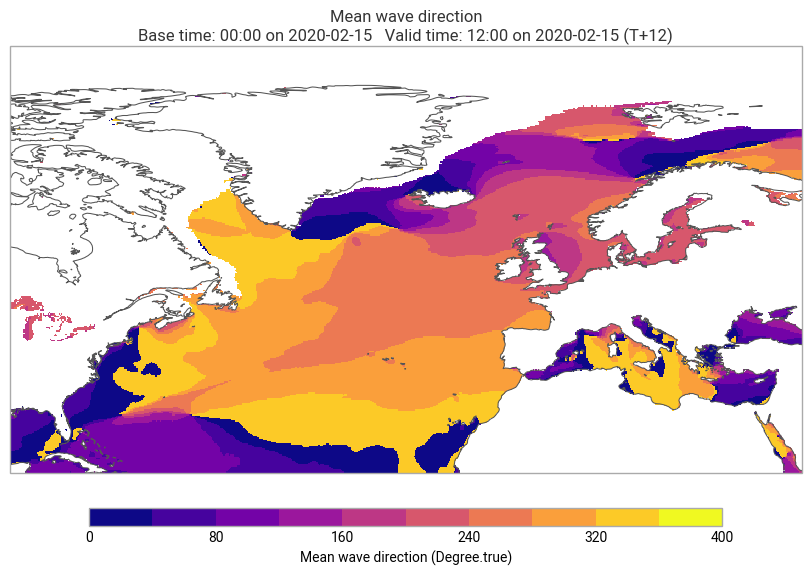

In [11]:
chart = earthkit.plots.Map()

p = chart.block(data[0])

chart.coastlines()

with earthkit.plots.schema.set(units_format="~E"):
    chart.legend()

chart.title()

chart.show()